### CS767 Term Project | Yi Rong | 11/30/2020

In [4]:
import pandas as pd
import re
import pdb
import json
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.decomposition import PCA
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import time

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pytz
from pytz import timezone
from datetime import date
import pandas_datareader as web
import io
import pickle
from pandas.tseries.offsets import BDay

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import activations
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

import math
import time

AttributeError: type object 'pandas._libs.tslibs.conversion._TSObject' has no attribute '__reduce_cython__'

Naive Bayes Classifier

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pdb
sns.set()

Load Data

In [2]:
root_path = "F:\\YI RONG\\BU\\academic\\CS 767 Machine Learning\\Term Paper\\"

dict_mlp_production_result_path = root_path + "mlp_result\\dict_mlp_production_result.pickle"
with open(dict_mlp_production_result_path, 'rb') as f:
    try:
        dict_mlp_production_result = pickle.load(f)
    except io.UnsupportedOperation:
        dict_mlp_production_result = {}

In [4]:
dict_mlp_production_result.pop("FB")

{'df_bow':              abandon  abil  abl  abus  academ  accc  accept  access  account  \
 News Number                                                                    
 0                  0     0    0     0       0     0       0       0        0   
 1                  0     0    0     0       0     0       0       0        0   
 2                  0     0    0     0       0     0       0       0        0   
 3                  0     0    0     0       0     0       0       0        0   
 4                  0     0    0     0       0     0       0       0        0   
 ...              ...   ...  ...   ...     ...   ...     ...     ...      ...   
 1363               0     0    0     0       0     0       0       0        0   
 1364               0     0    0     0       0     0       0       0        0   
 1365               0     0    0     0       0     0       0       0        0   
 1366               0     0    0     0       0     0       0       0        0   
 1367             

Baseline

In [5]:
dict_baseline = {}
for ticker in dict_mlp_production_result.keys():
    print("baseline for: " + ticker )
    dict_baseline[ticker] = {}
    df = dict_mlp_production_result[ticker]["df_combine"]
    for col in df.columns:
        if "rl_" in col:
            print("baseline : " + ticker + " " + col)
            bl = max(len(df[df[col] >= 0]) / len(df[col]), len(df[df[col] < 0]) / len(df[col]))
            print(bl)
            dict_baseline[ticker][col] = bl

baseline for: BA
baseline : BA rl_rt_1
0.5452991452991452
baseline : BA rl_rt_3
0.5307692307692308
baseline : BA rl_rt_5
0.5311965811965812
baseline : BA rl_rt_10
0.5012820512820513
baseline : BA rl_rt_21
0.5555555555555556
baseline : BA rl_rt_63
0.5482905982905983
baseline for: AAPL
baseline : AAPL rl_rt_1
0.533794571580628
baseline : AAPL rl_rt_3
0.5375199574241618
baseline : AAPL rl_rt_5
0.5518893028206493
baseline : AAPL rl_rt_10
0.5997871208089409
baseline : AAPL rl_rt_21
0.6381053751995742
baseline : AAPL rl_rt_63
0.7780734433209153
baseline for: TSLA
baseline : TSLA rl_rt_1
0.5065034429992349
baseline : TSLA rl_rt_3
0.5195103289977047
baseline : TSLA rl_rt_5
0.5241009946442234
baseline : TSLA rl_rt_10
0.5087987758224942
baseline : TSLA rl_rt_21
0.521805661820964
baseline : TSLA rl_rt_63
0.5929609793420046
baseline for: DB
baseline : DB rl_rt_1
0.5772432932469935
baseline : DB rl_rt_3
0.5559666975023126
baseline : DB rl_rt_5
0.574468085106383
baseline : DB rl_rt_10
0.620721554116

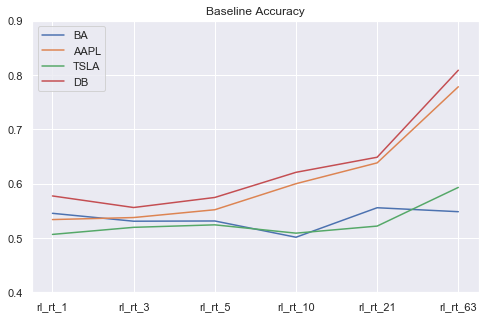

In [6]:
df_baseline = pd.DataFrame(dict_baseline)
df_baseline.plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0.4, 0.9) 
plt.title("Baseline Accuracy")
plt.show()

In [10]:
print(df_baseline.round(3).to_latex(index=True)) 

\begin{tabular}{lrrrr}
\toprule
{} &     BA &   AAPL &   TSLA &     DB \\
\midrule
rl\_rt\_1  &  0.545 &  0.534 &  0.507 &  0.577 \\
rl\_rt\_3  &  0.531 &  0.538 &  0.520 &  0.556 \\
rl\_rt\_5  &  0.531 &  0.552 &  0.524 &  0.574 \\
rl\_rt\_10 &  0.501 &  0.600 &  0.509 &  0.621 \\
rl\_rt\_21 &  0.556 &  0.638 &  0.522 &  0.648 \\
rl\_rt\_63 &  0.548 &  0.778 &  0.593 &  0.809 \\
\bottomrule
\end{tabular}



In [21]:
df_baseline.mean()

BA      0.535399
AAPL    0.606528
TSLA    0.528947
DB      0.630897
dtype: float64

Data Shape

In [2]:
for ticker in dict_mlp_production_result.keys():
    print(ticker + " bag of words shape: " + str(dict_mlp_production_result[ticker]['df_bow'].shape))

NameError: name 'dict_mlp_production_result' is not defined

Add Labels

In [95]:
# assign labels for each review, 0 for negative and 1 for positive
df_raw = df_bow2.copy()

df_raw["_class"] = np.where(dict_mlp_production_result["BA"]['df_combine']["rl_rt_1"] >= 0, 1, 0)

Train a Naive Bayes Classifier

In [106]:
InitSeed = 767
df_nbc, df_nbc_test = train_test_split(df_raw, test_size=0.2, random_state=InitSeed)

In [107]:
# compute the probability of each word given positive review
df_nbc_pos = df_nbc[df_nbc["_class"] == 1] # positive review
df_nbc_pos = df_nbc_pos.T 
df_nbc_pos = df_nbc_pos[:-1] # delete last row "_class"

# compute based on naive bayes classifier formula
df_nbc_pos["prob_pos"] = (df_nbc_pos.sum(axis = 1) + 1) / (df_nbc_pos.sum().sum() + df_nbc_pos.shape[0])

In [108]:
df_nbc_pos

News Number,1891,234,1476,1124,904,1972,388,1108,1332,1624,...,1733,1743,1645,1563,1903,726,2282,2207,70,prob_pos
aai,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000215
ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000108
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000215
abradin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000108
absurd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
york,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000215
yr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000108
zealand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000646
zero,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000215


In [109]:
# compute the probability of each word given negative review
df_nbc_neg = df_nbc[df_nbc["_class"] == 0]# negative review
df_nbc_neg = df_nbc_neg.T
df_nbc_neg = df_nbc_neg[:-1]# delete last row "_class"

# compute based on classifier formula for each word
df_nbc_neg["prob_neg"] = (df_nbc_neg.sum(axis = 1) + 1) / (df_nbc_neg.sum().sum() + df_nbc_neg.shape[0])

In [110]:
df_nbc_neg

News Number,1606,1162,873,773,1751,403,29,621,922,1994,...,1681,319,2088,1433,1825,909,1694,293,1264,prob_neg
aai,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000094
ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000188
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000188
abradin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000188
absurd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
york,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000094
yr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000188
zealand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000281
zero,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000188


Prediction

In [111]:
# compute probability for positive and negative
# use "==1/0" in case of some records have no class
prob_test_pos = sum(df_nbc["_class"] == 1) / (sum(df_nbc["_class"] == 1) + sum(df_nbc["_class"] == 0))
prob_test_neg = sum(df_nbc["_class"] == 0) / (sum(df_nbc["_class"] == 1) + sum(df_nbc["_class"] == 0))

In [112]:
prob_test_pos, prob_test_neg

(0.45821462488129155, 0.5417853751187085)

In [113]:
def nbc_predict(ps):
    # predict test set
    
#     pdb.set_trace()
    prob_pos = df_nbc_pos["prob_pos"][ps != 0].product() * prob_test_pos
    prob_neg = df_nbc_neg["prob_neg"][ps != 0].product() * prob_test_neg
    if prob_pos >= prob_neg:
        return 1
    else:
        return 0

In [114]:
pred_class = df_nbc_test.apply(nbc_predict, axis = 1)
pred_class

News Number
1352    0
631     0
348     1
1721    0
1866    1
       ..
673     1
1065    0
193     1
1274    0
90      1
Length: 234, dtype: int64

In [115]:
len(pred_class[df_nbc_test._class == pred_class]) / len(pred_class)

0.6282051282051282

In [3]:
def nbc_evaluate(df_raw):
    InitSeed = 767
    df_nbc, df_nbc_test = train_test_split(df_raw, test_size=0.2, random_state=InitSeed)
    
    # compute the probability of each word given positive review
    df_nbc_pos = df_nbc[df_nbc["_class"] == 1] # positive review
    df_nbc_pos = df_nbc_pos.T 
    df_nbc_pos = df_nbc_pos[:-1] # delete last row "_class"

    # compute based on naive bayes classifier formula
    df_nbc_pos["prob_pos"] = (df_nbc_pos.sum(axis = 1) + 1) / (df_nbc_pos.sum().sum() + df_nbc_pos.shape[0])   
    
    # compute the probability of each word given negative review
    df_nbc_neg = df_nbc[df_nbc["_class"] == 0]# negative review
    df_nbc_neg = df_nbc_neg.T
    df_nbc_neg = df_nbc_neg[:-1]# delete last row "_class"

    # compute based on classifier formula for each word
    df_nbc_neg["prob_neg"] = (df_nbc_neg.sum(axis = 1) + 1) / (df_nbc_neg.sum().sum() + df_nbc_neg.shape[0])    
    
    # compute probability for positive and negative
    # use "==1/0" in case of some records have no class
    prob_test_pos = sum(df_nbc["_class"] == 1) / (sum(df_nbc["_class"] == 1) + sum(df_nbc["_class"] == 0))
    prob_test_neg = sum(df_nbc["_class"] == 0) / (sum(df_nbc["_class"] == 1) + sum(df_nbc["_class"] == 0))
    
    def _nbc_predict(ps):
        # predict test set
        prob_pos = df_nbc_pos["prob_pos"][ps != 0].product() * prob_test_pos
        prob_neg = df_nbc_neg["prob_neg"][ps != 0].product() * prob_test_neg
        if prob_pos >= prob_neg:
            return 1
        else:
            return 0    
    
    pred_class = df_nbc_test.apply(_nbc_predict, axis = 1)
    
    result = len(pred_class[df_nbc_test._class == pred_class]) / len(pred_class)
    
    return result

In [37]:
root_path = "F:\\YI RONG\\BU\\academic\\CS 767 Machine Learning\\Term Paper\\"

dict_mlp_production_result_path = root_path + "mlp_result\\dict_mlp_production_result.pickle"
with open(dict_mlp_production_result_path, 'rb') as f:
    try:
        dict_mlp_production_result = pickle.load(f)
    except io.UnsupportedOperation:
        dict_mlp_production_result = {}
  
        
L_ticker = list(dict_mlp_production_result.keys())
L_label = ["rl_rt_1", "rl_rt_3", "rl_rt_5", "rl_rt_10", "rl_rt_21", "rl_rt_63"]

dict_nbc_production_result_path = root_path + "mlp_result\\dict_nbc_production_result.pickle"
with open(dict_nbc_production_result_path, 'rb') as f:
    try:
        dict_nbc_production_result = pickle.load(f)
    except io.UnsupportedOperation:
        dict_nbc_production_result = {}


In [36]:
for ticker in L_ticker:
    
    print("Start data processing: " + ticker)
    if ticker not in dict_nbc_production_result.keys():
        dict_nbc_production_result[ticker] = {}    
    
    for label in L_label:
        
        print("Start training: " + label)
        
        
        df_bow2 = dict_mlp_production_result[ticker]["df_bow"]

        # assign labels for each review, 0 for negative and 1 for positive
        df_raw = df_bow2.copy()

        df_raw["_class"] = np.where(dict_mlp_production_result[ticker]['df_combine'][label] >= 0, 1, 0)

        result = nbc_evaluate(df_raw)
        dict_nbc_production_result[ticker][label] =result
        print("Accuracy: " + str(result))
        
with open(dict_nbc_production_result_path, 'wb') as f:
    pickle.dump(dict_nbc_production_result, f)
    f.close()

Start data processing: BA
Start training: rl_rt_1


NameError: name 'nbc_evaluate' is not defined

Result Visualization

In [40]:
df_accuracy_nbc = pd.DataFrame(dict_nbc_production_result)
df_nbc_bl = df_accuracy_nbc - df_baseline
print(df_nbc_bl.round(3).to_latex(index=True)) 

\begin{tabular}{lrrrr}
\toprule
{} &     BA &   AAPL &   TSLA &     DB \\
\midrule
rl\_rt\_1  &  0.085 &  0.083 &  0.066 &  0.022 \\
rl\_rt\_3  &  0.082 &  0.080 &  0.152 &  0.075 \\
rl\_rt\_5  &  0.112 &  0.094 &  0.178 &  0.085 \\
rl\_rt\_10 &  0.165 &  0.044 &  0.148 &  0.084 \\
rl\_rt\_21 &  0.167 &  0.032 &  0.188 &  0.006 \\
rl\_rt\_63 &  0.174 & -0.025 &  0.147 &  0.044 \\
\bottomrule
\end{tabular}



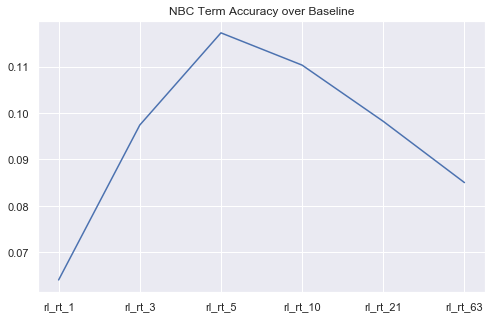

In [41]:
df_nbc_bl.T.mean().plot(figsize=(8, 5)) 
plt.grid(True)
plt.title("NBC Term Accuracy over Baseline")
plt.show()

In [36]:
23/24

0.9583333333333334

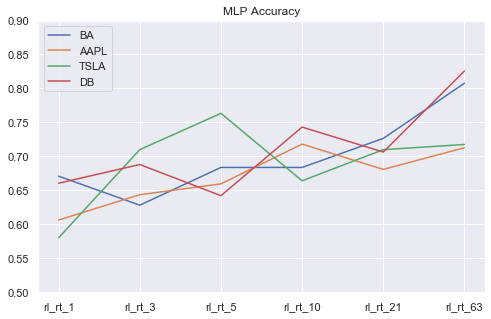

In [11]:
dict_accuracy = {}
for ticker in dict_mlp_production_result.keys():
    dict_accuracy[ticker] = {}
    for label in dict_mlp_production_result[ticker].keys():
        if "rt" in label:
            result = dict_mlp_production_result[ticker][label]["evaluate"]
            dict_accuracy[ticker][label] = result[1]

df_accuracy_mlp = pd.DataFrame(dict_accuracy)
df_accuracy_mlp.plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0.5, 0.9) 
plt.title("MLP Accuracy")
plt.show()

In [13]:
df_mlp_bl = df_accuracy_mlp - df_baseline
print(df_mlp_bl.round(3).to_latex(index=True)) 

\begin{tabular}{lrrrr}
\toprule
{} &     BA &   AAPL &   TSLA &     DB \\
\midrule
rl\_rt\_1  &  0.126 &  0.073 &  0.074 &  0.083 \\
rl\_rt\_3  &  0.097 &  0.106 &  0.190 &  0.132 \\
rl\_rt\_5  &  0.153 &  0.108 &  0.239 &  0.068 \\
rl\_rt\_10 &  0.182 &  0.118 &  0.155 &  0.122 \\
rl\_rt\_21 &  0.171 &  0.043 &  0.188 &  0.058 \\
rl\_rt\_63 &  0.259 & -0.065 &  0.125 &  0.017 \\
\bottomrule
\end{tabular}



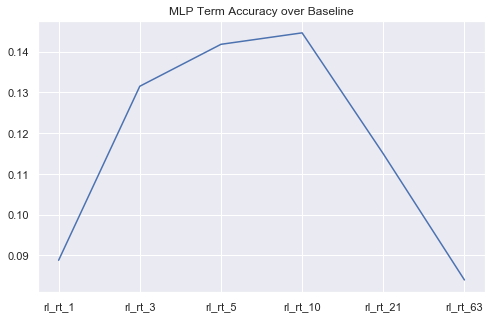

In [32]:
df_mlp_bl.T.mean().plot(figsize=(8, 5)) 
plt.grid(True)
plt.title("MLP Term Accuracy over Baseline")
plt.show()

In [60]:
df_accuracy_nbc.iloc[:3,:].mean(axis=0)

BA      0.628917
AAPL    0.626773
TSLA    0.648855
DB      0.629800
dtype: float64

In [61]:
df_accuracy_nbc.iloc[3:,:].mean(axis=0)

BA      0.703704
AAPL    0.688830
TSLA    0.702290
DB      0.737327
dtype: float64

In [45]:
df_accuracy_nbc.iloc[:3,:].mean(axis=0).mean()

0.633586424403623

In [46]:
df_accuracy_nbc.iloc[3:,:].mean(axis=0).mean()

0.708037689053429

In [47]:
df_accuracy_mlp.mean(axis=0) - df_accuracy_nbc.mean(axis=0)

BA      0.033832
AAPL    0.012411
TSLA    0.015267
DB      0.027445
dtype: float64

In [48]:
df_accuracy_mlp.mean(axis=0)

BA      0.700142
AAPL    0.670213
TSLA    0.690840
DB      0.711009
dtype: float64

In [54]:
df_accuracy_mlp.mean(axis=0).mean()

0.6930510227878888

In [49]:
df_accuracy_nbc.mean(axis=0)

BA      0.666311
AAPL    0.657801
TSLA    0.675573
DB      0.683564
dtype: float64

In [56]:
df_accuracy_nbc.mean().mean()

0.6708120567285261

In [50]:
df_accuracy_nbc.max()

BA      0.722222
AAPL    0.752660
TSLA    0.740458
DB      0.852535
dtype: float64

In [51]:
df_accuracy_mlp.max()

BA      0.807692
AAPL    0.718085
TSLA    0.763359
DB      0.825688
dtype: float64

In [52]:
df_accuracy_mlp

,BA,AAPL,TSLA,DB
rl_rt_1,0.670940,0.606383,0.580153,0.660550
rl_rt_3,0.628205,0.643617,0.709924,0.688073
rl_rt_5,0.683761,0.659574,0.763359,0.642202
rl_rt_10,0.683761,0.718085,0.664122,0.743119
rl_rt_21,0.726496,0.680851,0.709924,0.706422
rl_rt_63,0.807692,0.712766,0.717557,0.825688
